In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows',169)
pd.set_option('display.max.columns',169)
pd.set_option('float_format', '{:.2f}'.format)

In [4]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


In [3]:
df.shape

(5000, 14)

In [4]:
df.info(verbose = True,null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<ipython-input-4-6fb98828c284>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose = True,null_counts = True)


In [5]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,2500.50,45.34,20.10,73.77,93152.50,2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,1443.52,11.46,11.47,46.03,2121.85,1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,9307.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1250.75,35.00,10.00,39.00,91911.00,1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2500.50,45.00,20.00,64.00,93437.00,2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,3750.25,55.00,30.00,98.00,94608.00,3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,5000.00,67.00,43.00,224.00,96651.00,4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


In [6]:
df.select_dtypes(include = "object").columns

Index([], dtype='object')

In [7]:
df.select_dtypes(include=["int64","float64"]).columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)

In [9]:
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)

In [10]:
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
0,ID,0,0.00
1,Age,0,0.00
2,Experience,0,0.00
3,Income,0,0.00
4,ZIP Code,0,0.00
5,Family,0,0.00
6,CCAvg,0,0.00
7,Education,0,0.00
8,Mortgage,0,0.00
9,Personal Loan,0,0.00


In [11]:
from collections import Counter

#drop the label 
outlier_list = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education','Mortgage',
                'Securities Account', 'CD Account', 'Online', 'CreditCard'] 

def detect_outlier(df,feature):
    
    outlier_indices = []
    
    for f in feature:
        
        #lower quartile
        q1 = np.percentile(df[f],25)
        
        #upper quartile
        q3 = np.percentile(df[f],75)
        
        #interquartile range
        iqr = q3-q1
        
        #with coefficient
        with_coef = 1.5*iqr
        
        #detect outlier(s)
        lower_rule = q1-with_coef
        upper_rule = q3+with_coef
        
        outlier_variable = df[(df[f]<lower_rule) | (df[f]>upper_rule)].index
        outlier_indices.extend(outlier_variable)
    
    #converting to amount
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v>2)
    
    return multiple_outliers

 
#drop outliers
df = df.drop(detect_outlier(df,outlier_list),axis=0).reset_index(drop=True)

In [6]:
df['Income']= [0 if i <=150 else 1 if i>150 and i<=200 else 2 for i in df.Income]

In [13]:
df['Mrt_Grp']=[0 if i==0 else 1 for i in df.Mortgage]

In [14]:
category_columns = df.drop(['ID', 'Age', 'Experience', 'CCAvg', 'Mortgage','ZIP Code'], axis = 1)

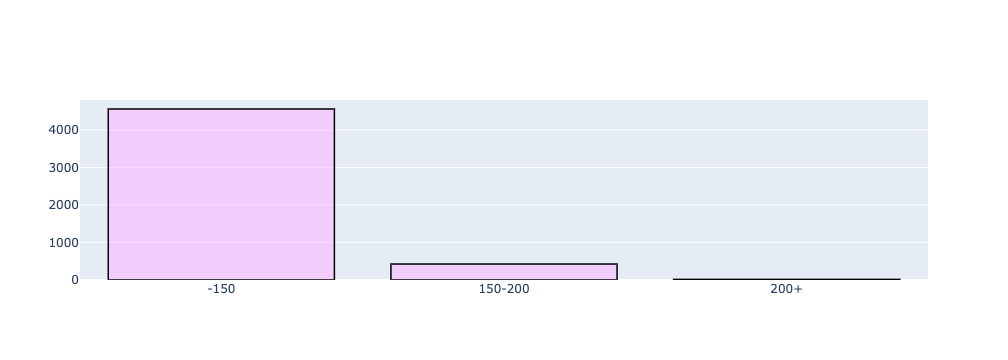

In [36]:
#from plotly.offline import init_notebook_mode, iplot, plot

#trace1 = go.Bar(x = ['-150','150-200','200+'],
#               y = df['Income'].value_counts(),
#               name = 'Income',
#               marker = dict(color = 'rgba(255, 174, 255, 0.5)',
#                            line = dict(color='rgb(0,0,0)', width = 1.5))
#               )
#data = [trace1]
#layout = go.Layout(barmode = "group")
#fig = go.Figure(data = data, layout = layout)
#iplot(fig)

In [15]:
def distributions(df, category_columns):
    plt.figure(figsize = (10,5))
    ax = sns.countplot(x = df[category_columns], data = df)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[category_columns]))
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plt.annotate(percentage, (x, y),ha='center')
    plt.show()

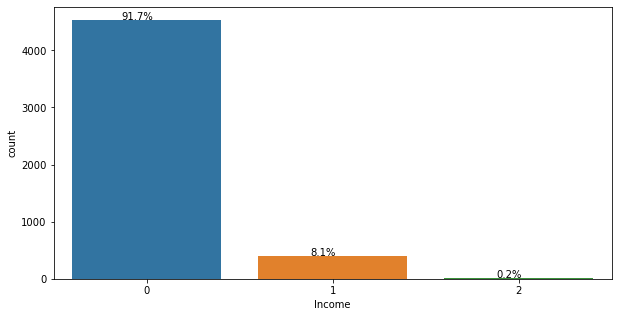

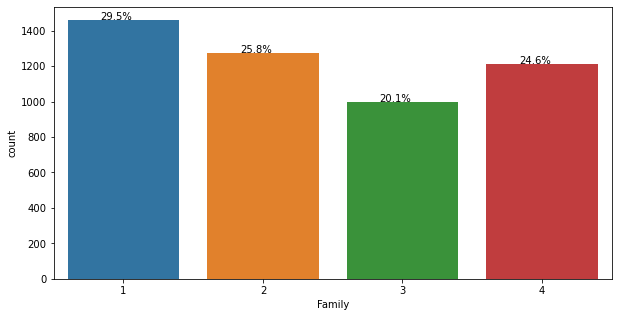

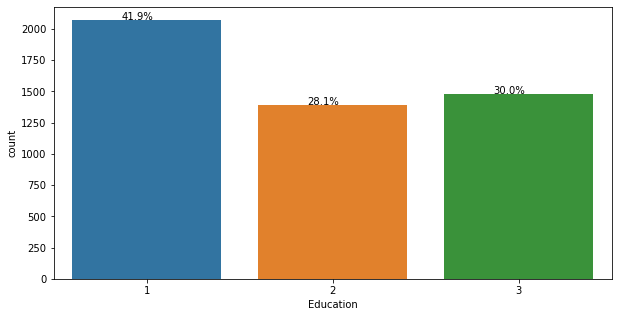

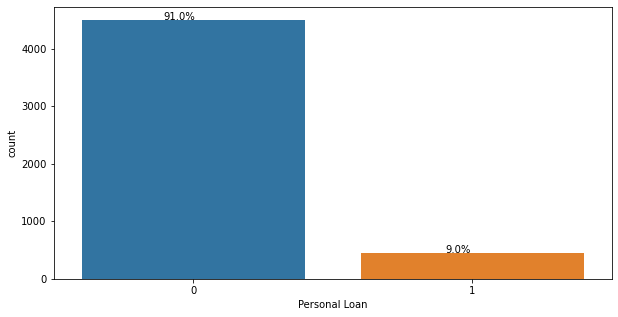

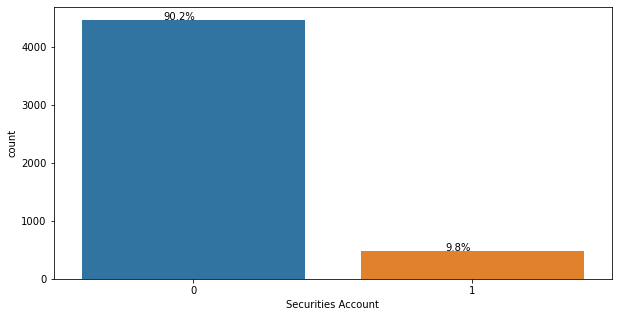

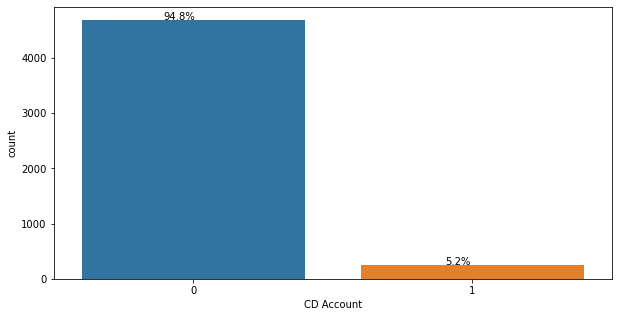

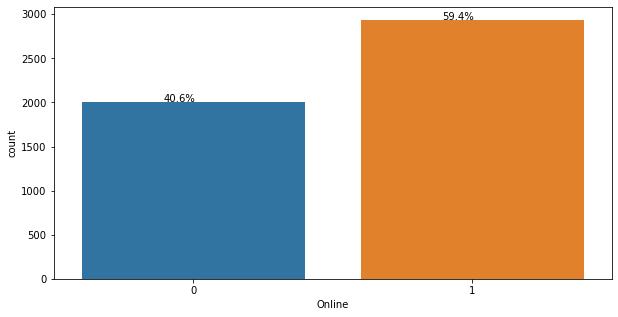

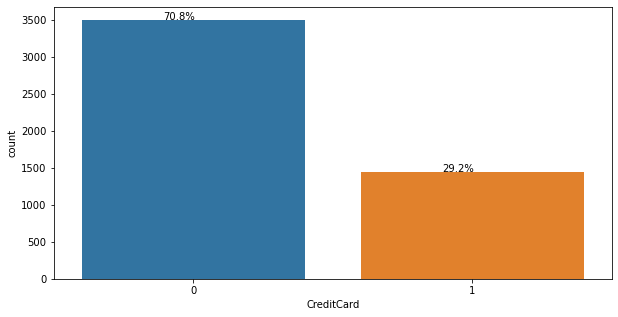

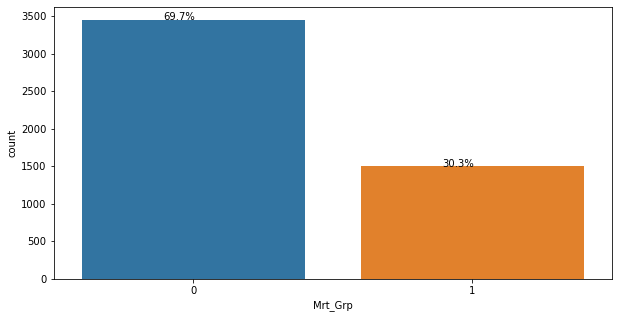

In [16]:
for i in category_columns:
    distributions(df,i)
    plt.show()

In [17]:
def catplot_func2(df,x):
    plt.figure(figsize=(15,4))
    g = sns.catplot(x=x, col="Personal Loan",
                data=df, kind="count",
                height=4, aspect=.7)
    plt.show()

<Figure size 1080x288 with 0 Axes>

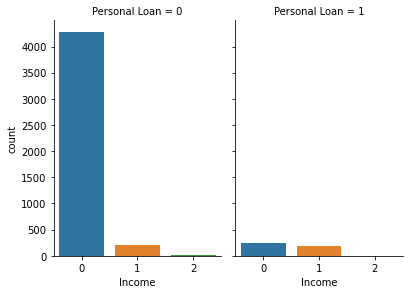

<Figure size 1080x288 with 0 Axes>

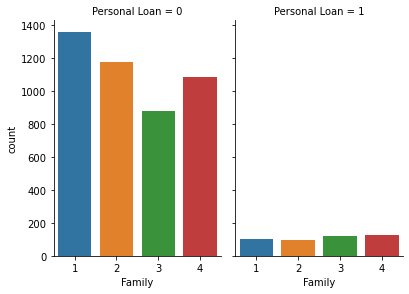

<Figure size 1080x288 with 0 Axes>

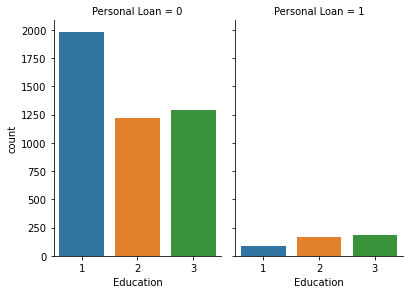

<Figure size 1080x288 with 0 Axes>

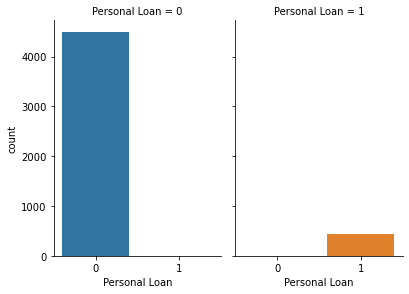

<Figure size 1080x288 with 0 Axes>

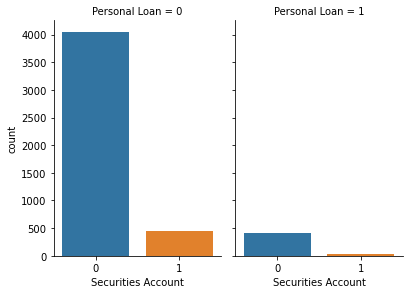

<Figure size 1080x288 with 0 Axes>

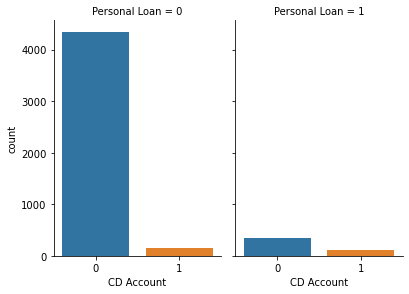

<Figure size 1080x288 with 0 Axes>

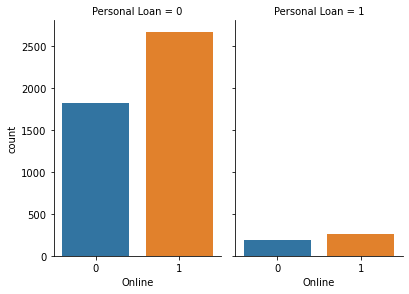

<Figure size 1080x288 with 0 Axes>

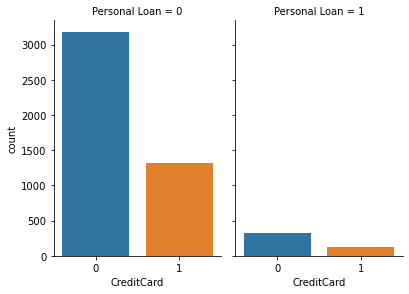

<Figure size 1080x288 with 0 Axes>

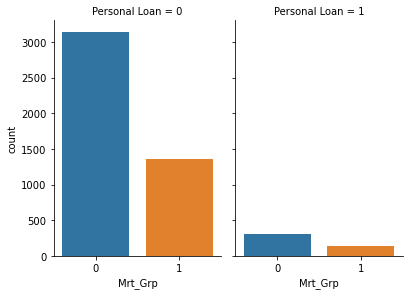

In [18]:
for i in category_columns:
    catplot_func2(df,i)
    plt.show()

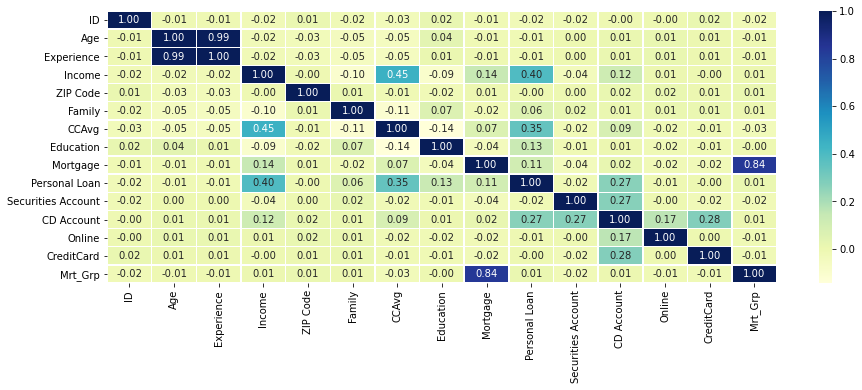

In [19]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu", linewidths=.5,fmt='.2f')
plt.show()

In [20]:
X = df.drop(['ID', 'Mortgage','ZIP Code', 'Personal Loan'], axis = 1)
y = df['Personal Loan']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [22]:
selector = SelectKBest(score_func=f_classif)
X_new = selector.fit_transform(X, y)
scores = sorted(zip(map(lambda x: round(x, 4), selector.scores_), X.columns), reverse=True)
pd.DataFrame(scores, columns=['Score', 'Feature']).head(50)

,Score,Feature
0,914.54,Income
1,677.20,CCAvg
2,373.36,CD Account
3,85.79,Education
4,17.91,Family
5,1.17,Securities Account
6,0.86,Mrt_Grp
7,0.49,Age
8,0.44,Experience
9,0.13,Online


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1, stratify=df['Personal Loan'])

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import VotingClassifier

In [25]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

In [26]:
pipelines = {
    'rf': make_pipeline(selector, RandomForestClassifier(random_state=42)),
    'gb': make_pipeline(selector, GradientBoostingClassifier(random_state=42)),
    'l1': make_pipeline(StandardScaler(), selector, LogisticRegression(penalty='l1', random_state= 1,solver='liblinear')),
    'l2': make_pipeline(StandardScaler(), selector, LogisticRegression(penalty='l2', random_state= 1,solver='liblinear')),
    'dt': make_pipeline(selector, DecisionTreeClassifier(random_state=42)),
    'knn': make_pipeline(StandardScaler(), selector, KNeighborsClassifier()),
    'svc':make_pipeline(StandardScaler(),selector, SVC(random_state=42))
}

In [27]:
for key, value in pipelines.items():
    print(key, type(value))

rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>
l1 <class 'sklearn.pipeline.Pipeline'>
l2 <class 'sklearn.pipeline.Pipeline'>
dt <class 'sklearn.pipeline.Pipeline'>
knn <class 'sklearn.pipeline.Pipeline'>
svc <class 'sklearn.pipeline.Pipeline'>


In [28]:
rf_hyperparameters = {
    'randomforestclassifier__criterion':['entropy','gini'],
    'randomforestclassifier__n_estimators': [100, 300],
    'randomforestclassifier__max_features': ['auto', 0.3, 0.6],
    'randomforestclassifier__min_samples_split':[2,3,10],
    'randomforestclassifier__min_samples_leaf':[1,3,10],
    'randomforestclassifier__bootstrap':[False]
}

gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators':[100, 500, 100],
    'gradientboostingclassifier__learning_rate': [0.001,0.01,0.1,0.05],
    'gradientboostingclassifier__max_depth':[3, 5, 10]
}

l1_hyperparameters = {
    'logisticregression__C': np.logspace(-3,3,7)
}
l2_hyperparameters = {
    'logisticregression__C': np.logspace(-3,3,7)
}
dt_hyperparameters = {
    "decisiontreeclassifier__max_depth" : [1,3,5,7],
    'decisiontreeclassifier__criterion':['entropy','gini'],
    'decisiontreeclassifier__splitter':['best']
}

knn_hyperparameters = {
    "kneighborsclassifier__n_neighbors": np.arange(1,50),
    "kneighborsclassifier__weights": ["uniform","distance"]
}
svc_hyperparameters = {
    'svc__C': [1.0,], 
    'svc__kernel': ['rbf',], 
    'svc__degree': [2,], 
    'svc__gamma' : [1.0,], 
    'svc__shrinking':[True,], 
    'svc__probability':[True,],
    'svc__tol': [0.001,],
    'svc__cache_size':[200,]
}



In [29]:
hyperparameter_grids = {
    'rf': rf_hyperparameters,
    'gb': gb_hyperparameters,
    'l1':l1_hyperparameters,
    'l2':l2_hyperparameters,
    'dt':dt_hyperparameters,
    'knn': knn_hyperparameters,
    'svc':svc_hyperparameters
}

In [30]:
for key in ['rf', 'gb', 'l1', 'l2', 'dt', 'knn', 'svc']:
    if key in hyperparameter_grids:
        if type(hyperparameter_grids[key]) is dict:
            print( key, 'was found, and it is a grid.' )
        else:
            print( key, 'was found, but it is not a grid.' )
    else:
        print( key, 'was not found')

rf was found, and it is a grid.
gb was found, and it is a grid.
l1 was found, and it is a grid.
l2 was found, and it is a grid.
dt was found, and it is a grid.
knn was found, and it is a grid.
svc was found, and it is a grid.


In [31]:
models = {}

for key in pipelines.keys():
    models[key]= GridSearchCV(pipelines[key], hyperparameter_grids[key], cv=cv, scoring = 'roc_auc',
                             n_jobs= -1,
                             verbose = 1)
    
models.keys()

dict_keys(['rf', 'gb', 'l1', 'l2', 'dt', 'knn', 'svc'])

In [46]:
cv_results = []
best_estimators = []

for key in models.keys():
    clf = models[key].fit(X_train,y_train)
    cv_results.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(key, "is trained and tuned")
    print('Method: {} Best: {}' .format(key,clf.best_estimator_))

Fitting 30 folds for each of 108 candidates, totalling 3240 fits
rf is trained and tuned
Method: rf Best: Pipeline(steps=[('selectkbest', SelectKBest()),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=False, criterion='entropy',
                                        max_features=0.6, n_estimators=300,
                                        random_state=42))])
Fitting 30 folds for each of 36 candidates, totalling 1080 fits
gb is trained and tuned
Method: gb Best: Pipeline(steps=[('selectkbest', SelectKBest()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=5,
                                            n_estimators=500,
                                            random_state=42))])
Fitting 30 folds for each of 7 candidates, totalling 210 fits
l1 is trained and tuned
Method: l1 Best: Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest

In [53]:
#print('Method: {}  Score: {} Best: {}' .format(key, cv_results[key],clf.best_estimator_))
ml_list = list(models.keys())
results = pd.DataFrame({'CV Means':cv_results,
                       'ML Models':ml_list})

In [54]:
results

,CV Means,ML Models
0,0.94,rf
1,0.94,gb
2,0.88,l1
3,0.88,l2
4,0.92,dt
5,0.91,knn
6,0.89,svc


In [59]:
from sklearn.metrics import accuracy_score, auc, f1_score, precision_score, recall_score,\
                            roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix

In [56]:
voting_c = VotingClassifier(estimators=[('rf',best_estimators[0]),
                                        ('gb',best_estimators[1]),
                                        ('l1',best_estimators[2]),
                                        ('l2',best_estimators[3]),
                                        ('dt',best_estimators[4]),
                                        ('knn', best_estimators[5]),
                                        ('svc', best_estimators[6])
                                       ],
                           voting='soft',
                           n_jobs=-1)

In [58]:
voting_c = voting_c.fit(X_train,y_train)
print("Score del modelo (accuracy):", round(voting_c.score(X_test, y_test), 3))
print("Accuracy score:", round(accuracy_score(voting_c.predict(X_test), y_test), 3))
print("Recall score:", round(recall_score(voting_c.predict(X_test), y_test), 3))
print("Precision score:", round(precision_score(voting_c.predict(X_test), y_test), 3))
print("F1 score:", round(f1_score(voting_c.predict(X_test), y_test), 3))
print("AUC:", round(roc_auc_score(voting_c.predict(X_test), y_test), 3))

Score del modelo (accuracy): 0.971
Accuracy score: 0.971
Recall score: 1.0
Precision score: 0.674
F1 score: 0.805
AUC: 0.984


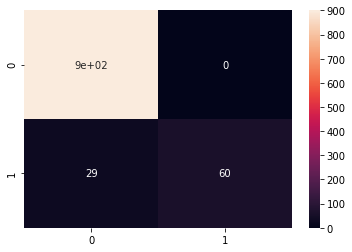

In [62]:
c_matrix = confusion_matrix(y_test, voting_c.predict(X_test))
sns.heatmap(c_matrix, annot=True);

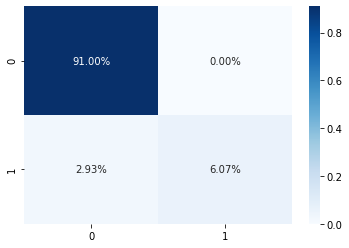

In [63]:
sns.heatmap(c_matrix/np.sum(c_matrix), annot=True, 
            fmt='.2%', cmap='Blues');